In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import zipfile

# Path to the zip file in Google Drive
zip_file_path = '/content/drive/MyDrive/facial_expression.zip'

# Destination path to extract the contents
destination_path = '/content/drive/MyDrive/FC'

In [ ]:
# Extract the contents of the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(destination_path)

In [ ]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical


In [ ]:
dataset_path = '/content/drive/MyDrive/FC/Dataset'

In [ ]:
expression_classes = os.listdir(dataset_path)

In [ ]:

labels_file_path = '/content/drive/MyDrive/FC/Dataset/labels.txt'
with open(labels_file_path, 'r') as file:
    labels = file.read().splitlines()

In [ ]:
expression_classes = []
with open(os.path.join(dataset_path, 'labels.txt'), 'r') as file:
    expression_classes = file.read().splitlines()

In [ ]:
images = []
labels = []

In [ ]:
for idx, expression in enumerate(expression_classes):
    train_expression_folder = os.path.join(dataset_path, 'train', expression)
    for image_name in os.listdir(train_expression_folder):
        image_path = os.path.join(train_expression_folder, image_name)
        print("Loading image:", image_path)  # Add this debug statement
        if os.path.isfile(image_path):  # Check if the current item is a file
            image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
            if image is not None:  # Check if the image was loaded successfully
                # ... rest of the preprocessing steps ...
                images.append(image)
                labels.append(idx)
            else:
                print("Error loading image:", image_path)
        else:
            print("Skipping non-image item:", image_path)

Streaming output truncated to the last 5000 lines.
Loading image: /content/drive/MyDrive/FC/Dataset/train/sadness/191759037.png
Loading image: /content/drive/MyDrive/FC/Dataset/train/sadness/192130961.png
Loading image: /content/drive/MyDrive/FC/Dataset/train/sadness/192227232.png
Loading image: /content/drive/MyDrive/FC/Dataset/train/sadness/192254693.png
Loading image: /content/drive/MyDrive/FC/Dataset/train/sadness/192266768.png
Loading image: /content/drive/MyDrive/FC/Dataset/train/sadness/192544020.png
Loading image: /content/drive/MyDrive/FC/Dataset/train/sadness/192660708.png
Loading image: /content/drive/MyDrive/FC/Dataset/train/sadness/192733950.png
Loading image: /content/drive/MyDrive/FC/Dataset/train/sadness/193004552.png
Loading image: /content/drive/MyDrive/FC/Dataset/train/sadness/193406912.png
Loading image: /content/drive/MyDrive/FC/Dataset/train/sadness/193772541.png
Loading image: /content/drive/MyDrive/FC/Dataset/train/sadness/194153738.png
Loading image: /content/d

In [ ]:
images = np.array(images)
labels = np.array(labels)

In [ ]:
images = images / 255.0

In [ ]:
print("Number of images:", len(images))
print("Number of labels:", len(labels))

Number of images: 32298
Number of labels: 32298


In [ ]:
print("Number of samples in train_images:", len(train_images))
print("Number of samples in train_labels:", len(train_labels))

Number of samples in train_images: 32298
Number of samples in train_labels: 25837


In [ ]:
base_path = "/content/drive/MyDrive/FC/Dataset/train"

for expression in os.listdir(base_path):
    expression_folder = os.path.join(base_path, expression)
    if os.path.isdir(expression_folder):
        num_images = len(os.listdir(expression_folder))
        print(f"{num_images} {expression} images")


4462 anger images
494 disgust images
4593 fear images
8110 happiness images
5572 neutral images
5483 sadness images
3586 surprise images


Found 32298 images belonging to 7 classes.
Found 3589 images belonging to 7 classes.


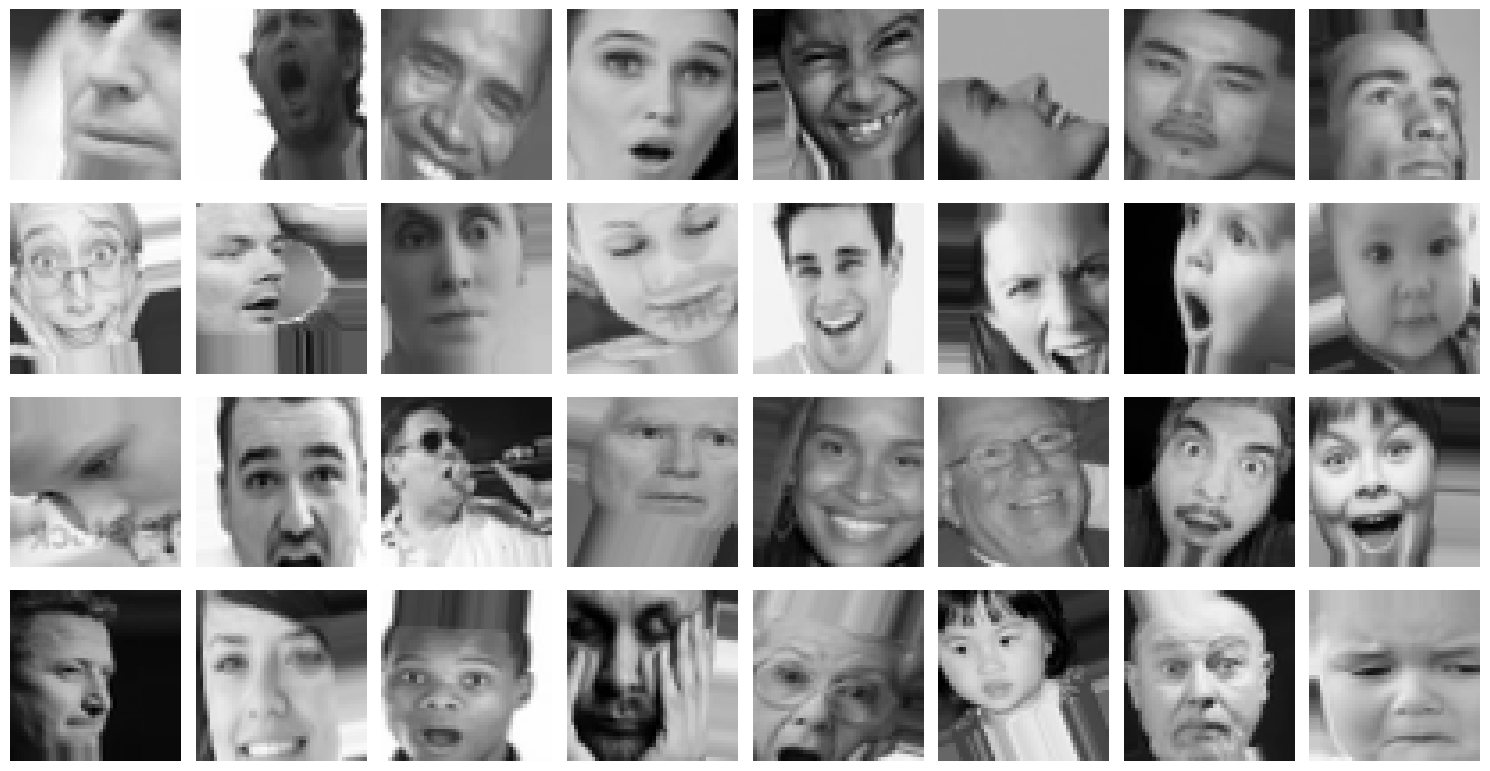

In [ ]:

import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator

# Define the paths to your dataset
train_data_dir = '/content/drive/MyDrive/FC/Dataset/train'
test_data_dir = '/content/drive/MyDrive/FC/Dataset/test'

# Define image dimensions and batch size
img_width, img_height = 48, 48
batch_size = 32

# Create ImageDataGenerator with data augmentation settings
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1.0 / 255)

# Flow training images in batches from the directory
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

# Flow validation images in batches from the directory
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Plot some augmented images for visualization
augmented_images = next(train_generator)
fig, axes = plt.subplots(4, 8, figsize=(15, 8))
axes = axes.flatten()

for img, ax in zip(augmented_images[0], axes):
    ax.imshow(img)
    ax.axis('off')

plt.tight_layout()



In [ ]:
train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size=0.2, random_state=42)

In [ ]:
num_classes = len(expression_classes)
train_labels = to_categorical(train_labels, num_classes)
test_labels = to_categorical(test_labels, num_classes)

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
def build_deep_model(input_shape, num_classes):
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
    model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    return model


In [ ]:
input_shape = (48, 48, 1)  # Assuming images are 48x48 grayscale images
num_classes = 7  # Number of facial expression classes (e.g., happy, sad, angry, etc.)
# Build the model
model = build_deep_model(input_shape, num_classes)
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_36 (Conv2D)          (None, 46, 46, 32)        320       
                                                                 
 max_pooling2d_36 (MaxPoolin  (None, 23, 23, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_37 (Conv2D)          (None, 21, 21, 64)        18496     
                                                                 
 max_pooling2d_37 (MaxPoolin  (None, 10, 10, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_38 (Conv2D)          (None, 8, 8, 128)         73856     
                                                                 
 conv2d_39 (Conv2D)          (None, 6, 6, 256)       

In [ ]:
from keras.utils import to_categorical
from keras.optimizers import SGD
optimizer = SGD(learning_rate=0.01, momentum=0.9)  # You can adjust the learning rate and momentum if needed
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(train_images, train_labels, epochs=5, batch_size=50, validation_data=(test_images, test_labels))

Epoch 1/5
517/517 [==============================] - 186s 355ms/step - loss: 1.8236 - accuracy: 0.2492 - val_loss: 1.7986 - val_accuracy: 0.2471
Epoch 2/5
517/517 [==============================] - 181s 350ms/step - loss: 1.7968 - accuracy: 0.2511 - val_loss: 1.7810 - val_accuracy: 0.2505
Epoch 3/5
517/517 [==============================] - 176s 341ms/step - loss: 1.7564 - accuracy: 0.2735 - val_loss: 1.6791 - val_accuracy: 0.3339
Epoch 4/5
517/517 [==============================] - 170s 329ms/step - loss: 1.6570 - accuracy: 0.3405 - val_loss: 1.5776 - val_accuracy: 0.3927
Epoch 5/5
517/517 [==============================] - 170s 330ms/step - loss: 1.5702 - accuracy: 0.3853 - val_loss: 1.4962 - val_accuracy: 0.4200


In [ ]:
loss, accuracy = model.evaluate(test_images, test_labels)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")


202/202 [==============================] - 14s 68ms/step - loss: 1.4962 - accuracy: 0.4200
Test Loss: 1.4962, Test Accuracy: 0.4200


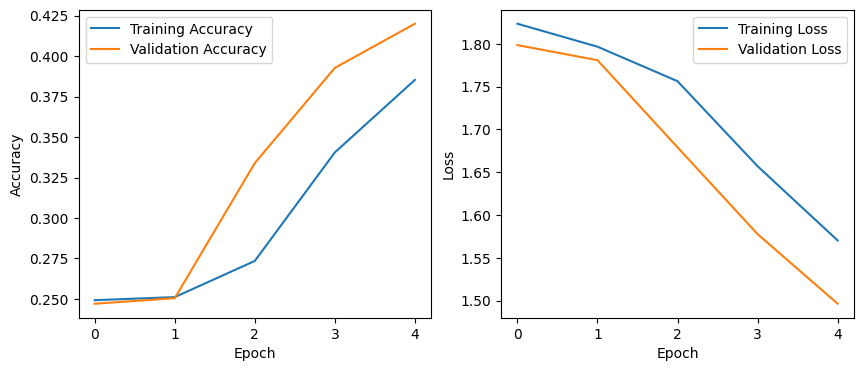

In [ ]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
model.save('facial_expression_model.h5')
loaded_model = load_model('facial_expression_model.h5')

In [ ]:
new_image_path = '/content/drive/MyDrive/Colab Notebooks/suprise.jpg'
new_image = cv2.imread(new_image_path, cv2.IMREAD_GRAYSCALE)

In [ ]:
new_image = cv2.resize(new_image, (48, 48))
new_image = new_image.reshape(1, 48, 48, 1)
new_image = new_image.astype('float32') / 255.0

In [ ]:
prediction = model.predict(new_image)

1/1 [==============================] - 0s 38ms/step


In [ ]:
expression_classes = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']
predicted_class = expression_classes[np.argmax(prediction)]
print("Predicted Expression:", predicted_class)

Predicted Expression: happy
